# Loading Data

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options for pandas
pd.set_option('display.max_columns', None)

# Load the dataset
filepath = 'data/raw/insurance_claims.csv'

df = pd.read_csv(filepath)
df_copy = df.copy()

# Display the first few rows of the copied DataFrame
df_copy.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_split,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,NaN,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


# Data Quality Assessment

### Variable Type 

In [2]:
# Numerical features
num_cols = [
    'months_as_customer',
    'age',
    'policy_deductable',
    'policy_annual_premium',
    'umbrella_limit',
    'capital-gains',
    'capital-loss',
    'total_claim_amount',
    'injury_claim',
    'property_claim',
    'vehicle_claim'
]

# Discrete numerical features
discrete_num_cols = [
    'number_of_vehicles_involved',
    'bodily_injuries',
    'witnesses'
]

# Define categorical features
cat_cols = [
    'policy_number',
    'policy_state',
    'policy_split',
    'insured_zip',
    'insured_sex',
    'insured_education_level',
    'insured_occupation',
    'insured_hobbies',
    'insured_relationship',
    'incident_type',
    'collision_type',
    'incident_severity',
    'authorities_contacted',
    'incident_state',
    'incident_city',
    'incident_location',
    'property_damage',
    'police_report_available',
    'auto_make',
    'auto_model',
    'fraud_reported'
]

# Define time series features
time_series_cols = [
    'policy_bind_date',
    'incident_date',
    'incident_hour_of_the_day',
    'auto_year'
]

# Verify that all columns are identified
for col in df_copy.columns:
    if col not in num_cols + discrete_num_cols + cat_cols + time_series_cols:
        print(f"Colum {col} is missing.")

### Structural Quality

In [3]:
# Display the shape of the DataFrame
print(f"""Shape of the DataFrame:
No. of rows     : {df_copy.shape[0]:}
No. of columns  : {df_copy.shape[1]:>4}
{"="*70}""")

# Display missing values information
missing_value_df = pd.DataFrame({
    'missing_value_count': df_copy.isnull().sum(),
    'missing_value_pct': df_copy.isnull().mean() * 100
})
print(f"""Columns with missing values:
{missing_value_df[missing_value_df['missing_value_count'] > 0]}
{"="*70}""")

# Display duplicate rows information
print(f"No. of duplicate rows : {df_copy.duplicated().sum()}")
print("="*70)

Shape of the DataFrame:
No. of rows     : 1000
No. of columns  :   39
Columns with missing values:
                       missing_value_count  missing_value_pct
authorities_contacted                   91                9.1
No. of duplicate rows : 0


- Only `authorities_contacted` has missing values, which can be managed by using "mode" or manual imputation depending on business standards.

### Numeric Features

In [4]:
# Display summary statistics for numerical features
print("Summary statistics for numerical features:")
df_copy[num_cols].describe().astype(int)

Summary statistics for numerical features:


,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,total_claim_amount,injury_claim,property_claim,vehicle_claim
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
mean,203,38,1136,1256,1101000,25126,-26793,52761,7433,7399,37928
std,115,9,611,244,2297406,27872,28104,26401,4880,4824,18886
min,0,19,500,433,-1000000,0,-111100,100,0,0,70
25%,115,32,500,1089,0,0,-51500,41812,4295,4445,30292
50%,199,38,1000,1257,0,0,-23250,58055,6775,6750,42100
75%,276,44,2000,1415,0,51025,0,70592,11305,10885,50822
max,479,64,2000,2047,10000000,100500,0,114920,21450,23670,79560


- Minimum value of `umbrella_limit` is -1000000, which is not plausible because it provides additional coverage.
- Therefore, it must be a non-negative value. This error must be due to the presence of a bug in data pipeline.
- **Recommended Action**: We have to transform values of the `umbrella_limit` into absolute values.

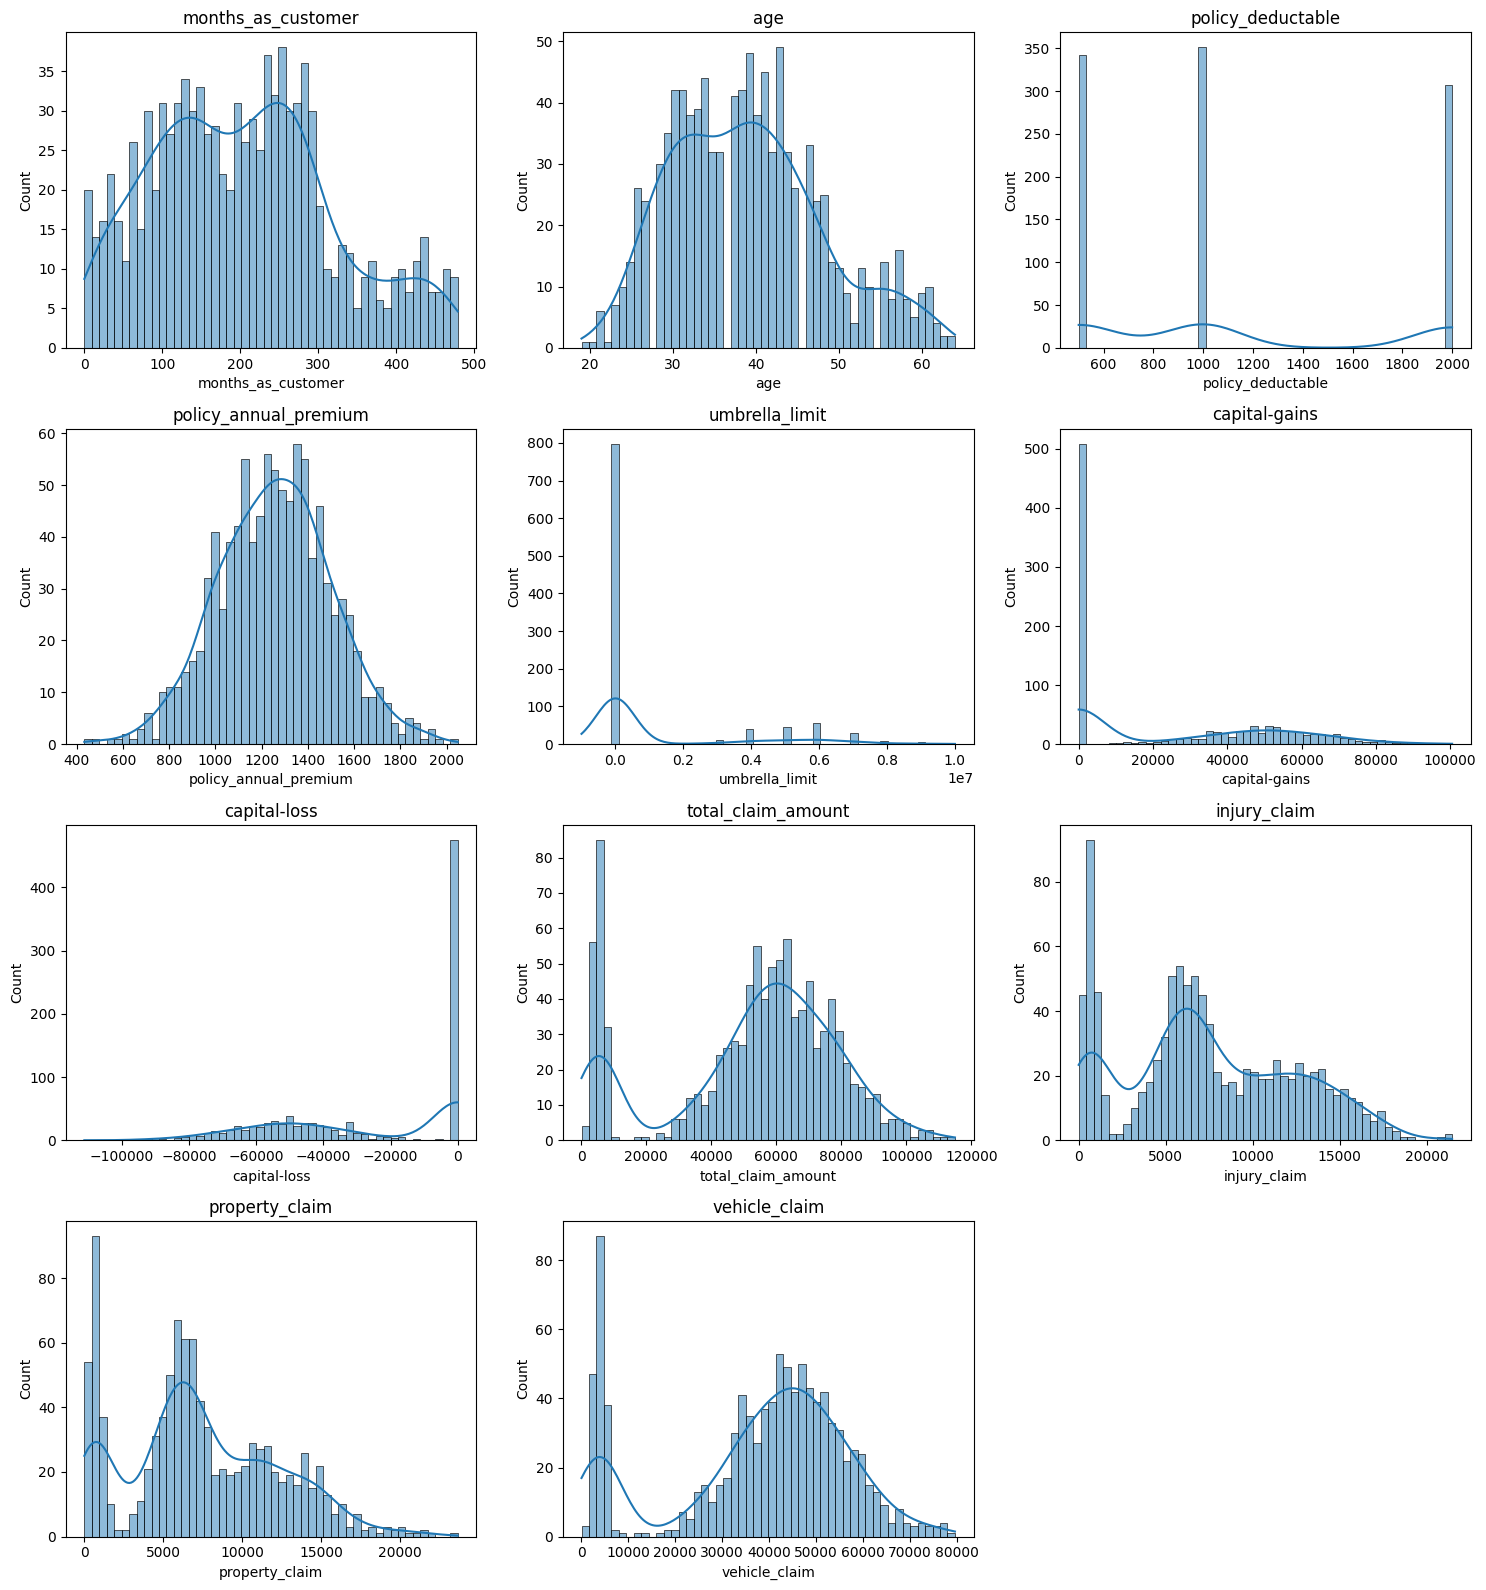

In [5]:
import math

n_cols = 3
n_rows = math.ceil(len(num_cols) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(
        data=df_copy[col],
        kde=True,
        bins=50,
        ax=axes[i]
    )
    axes[i].set_title(col)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

- `total_claim_amount` is a composite measure derived from the sum of `injury_claim`, `property_claim` and `vehicle_claim`.
- Through KDE plot, we can observe that the distribution is possibly bimodal i.e. two peaks of normal distribution.
- **Recommended Action**: Use statistical test to accept or reject this hypothesis.

In [45]:
# Hartigan’s Dip Test for Unimodality
# → H0: The distribution is unimodal
# → H1: The distribution is not unimodal (bimodal or multimodal)

from diptest import diptest

col_list = ['total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim']

for col in col_list:
    dip_value, p_value = diptest(df_copy[col])
    print(f"""Dip Test Results for {col}:
    Dip Statistic: {dip_value:.5}
    p-value: {p_value}""")

    if p_value < 0.05:
        print("→ Reject unimodality")
    else:
        print("→ Accept unimodality")
    print("="*40)

Dip Test Results for total_claim_amount:
    Dip Statistic: 0.066327
    p-value: 0.0
→ Reject unimodality
Dip Test Results for injury_claim:
    Dip Statistic: 0.056794
    p-value: 0.0
→ Reject unimodality
Dip Test Results for property_claim:
    Dip Statistic: 0.054165
    p-value: 0.0
→ Reject unimodality
Dip Test Results for vehicle_claim:
    Dip Statistic: 0.066309
    p-value: 0.0
→ Reject unimodality


- Based on the results of the Hartigan’s Dip Test, we can confirm bimodality.
- **Recommended Action**: Segment data into two groups using `total_claim_amount`.

### Discrete Features 

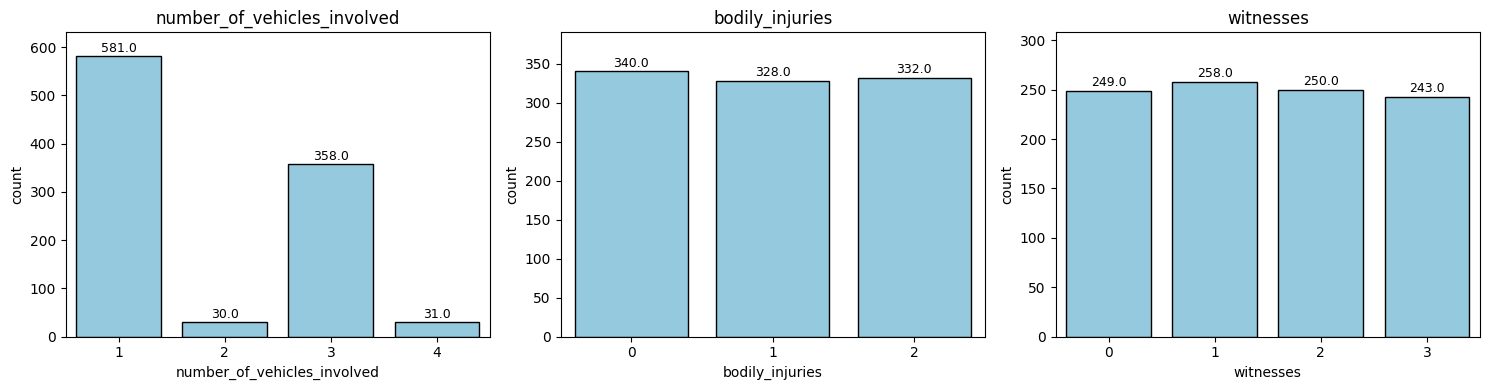

In [6]:
# Visualization of discrete numerical features

n_cols = 3
n_rows = math.ceil(len(discrete_num_cols) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(discrete_num_cols):
    ax = axes[i]
    sns.countplot(
        data=df_copy,
        x=col,
        color='skyblue',
        edgecolor='black',
        ax=ax
    )
    counts = df_copy[col].value_counts()
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height + 2),
                    ha='center', va='bottom', fontsize=9, color='black')
    ax.set_title(col)
    ax.set_ylim(0, counts.max() + 50)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

- `number_of_vehicles_involved` show clear and distinct patterns, where single vehicle accidents are highest.
- `bodily_injuries`and `witnesses` have uniform distribution.

### Categorical Features

#### Imbalance Detection

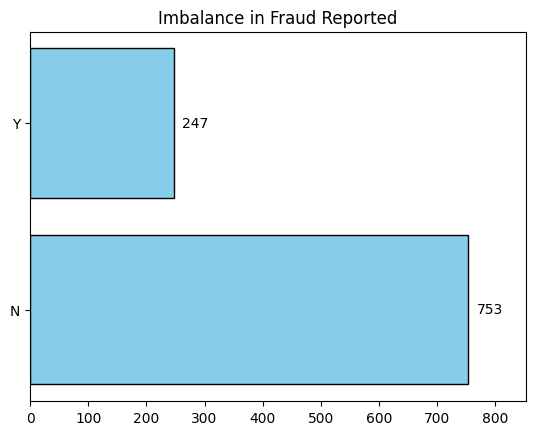

In [7]:
values = df_copy['fraud_reported'].value_counts().values
labels = df_copy['fraud_reported'].value_counts().index

bars = plt.barh(
    y=labels,
    width=values,
    color='skyblue',
    edgecolor='black'
)

for bar, value in zip(bars, values):
    plt.text(
        value + 15,  # Slightly to the right of the bar
        bar.get_y() + bar.get_height() / 2,
        str(value),
        va='center',
        fontsize=10,
        color='black'
    )
    plt.xlim(0, max(values) + 100)

plt.title('Imbalance in Fraud Reported')
plt.show()

#### Inconsistent Categories

In [8]:
cat_cols_copy = cat_cols.copy()
items_to_remove = [
    'policy_number', # unique identifier
    'insured_zip',   # high cardinality
    'incident_location', # high cardinality
    'insured_hobbies', # high cardinality
    'insured_occupation', # high cardinality
    'auto_model', # high cardinality
    'fraud_reported', # target variable
]

for item in items_to_remove: 
    while item in cat_cols_copy:
        cat_cols_copy.remove(item)

# Display unique values in categorial features
for col in cat_cols_copy:
    print(f"{col} : {df_copy[col].unique()}")

policy_state : ['OH' 'IN' 'IL']
policy_split : ['250/500' '100/300' '500/1000']
insured_sex : ['MALE' 'FEMALE']
insured_education_level : ['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']
insured_relationship : ['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']
incident_type : ['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']
collision_type : ['Side Collision' '?' 'Rear Collision' 'Front Collision']
incident_severity : ['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']
authorities_contacted : ['Police' nan 'Fire' 'Other' 'Ambulance']
incident_state : ['SC' 'VA' 'NY' 'OH' 'WV' 'NC' 'PA']
incident_city : ['Columbus' 'Riverwood' 'Arlington' 'Springfield' 'Hillsdale' 'Northbend'
 'Northbrook']
property_damage : ['YES' '?' 'NO']
police_report_available : ['YES' '?' 'NO']
auto_make : ['Saab' 'Mercedes' 'Dodge' 'Chevrolet' 'Accura' 'Nissan' 'Audi' 'Toyota'
 'Ford' 'Suburu' 'BMW' 'Jeep' 'Honda' 'Volkswagen']


- There are data inconsistency with “?”. We need to replace it with “NA” (Not Available)
- `authorities_contacted` have missing values which we already observed and will fill them with mode.
- `policy_state`, `insured_sex`, `insured_relationship`, `collision_type`, `authorities_contacted`, `incident_state`, `incident_city`,`property_damage`, `police_report_available` and `auto_make` are Nominal Type, rest are ordinal.

#### Frequency Distribution

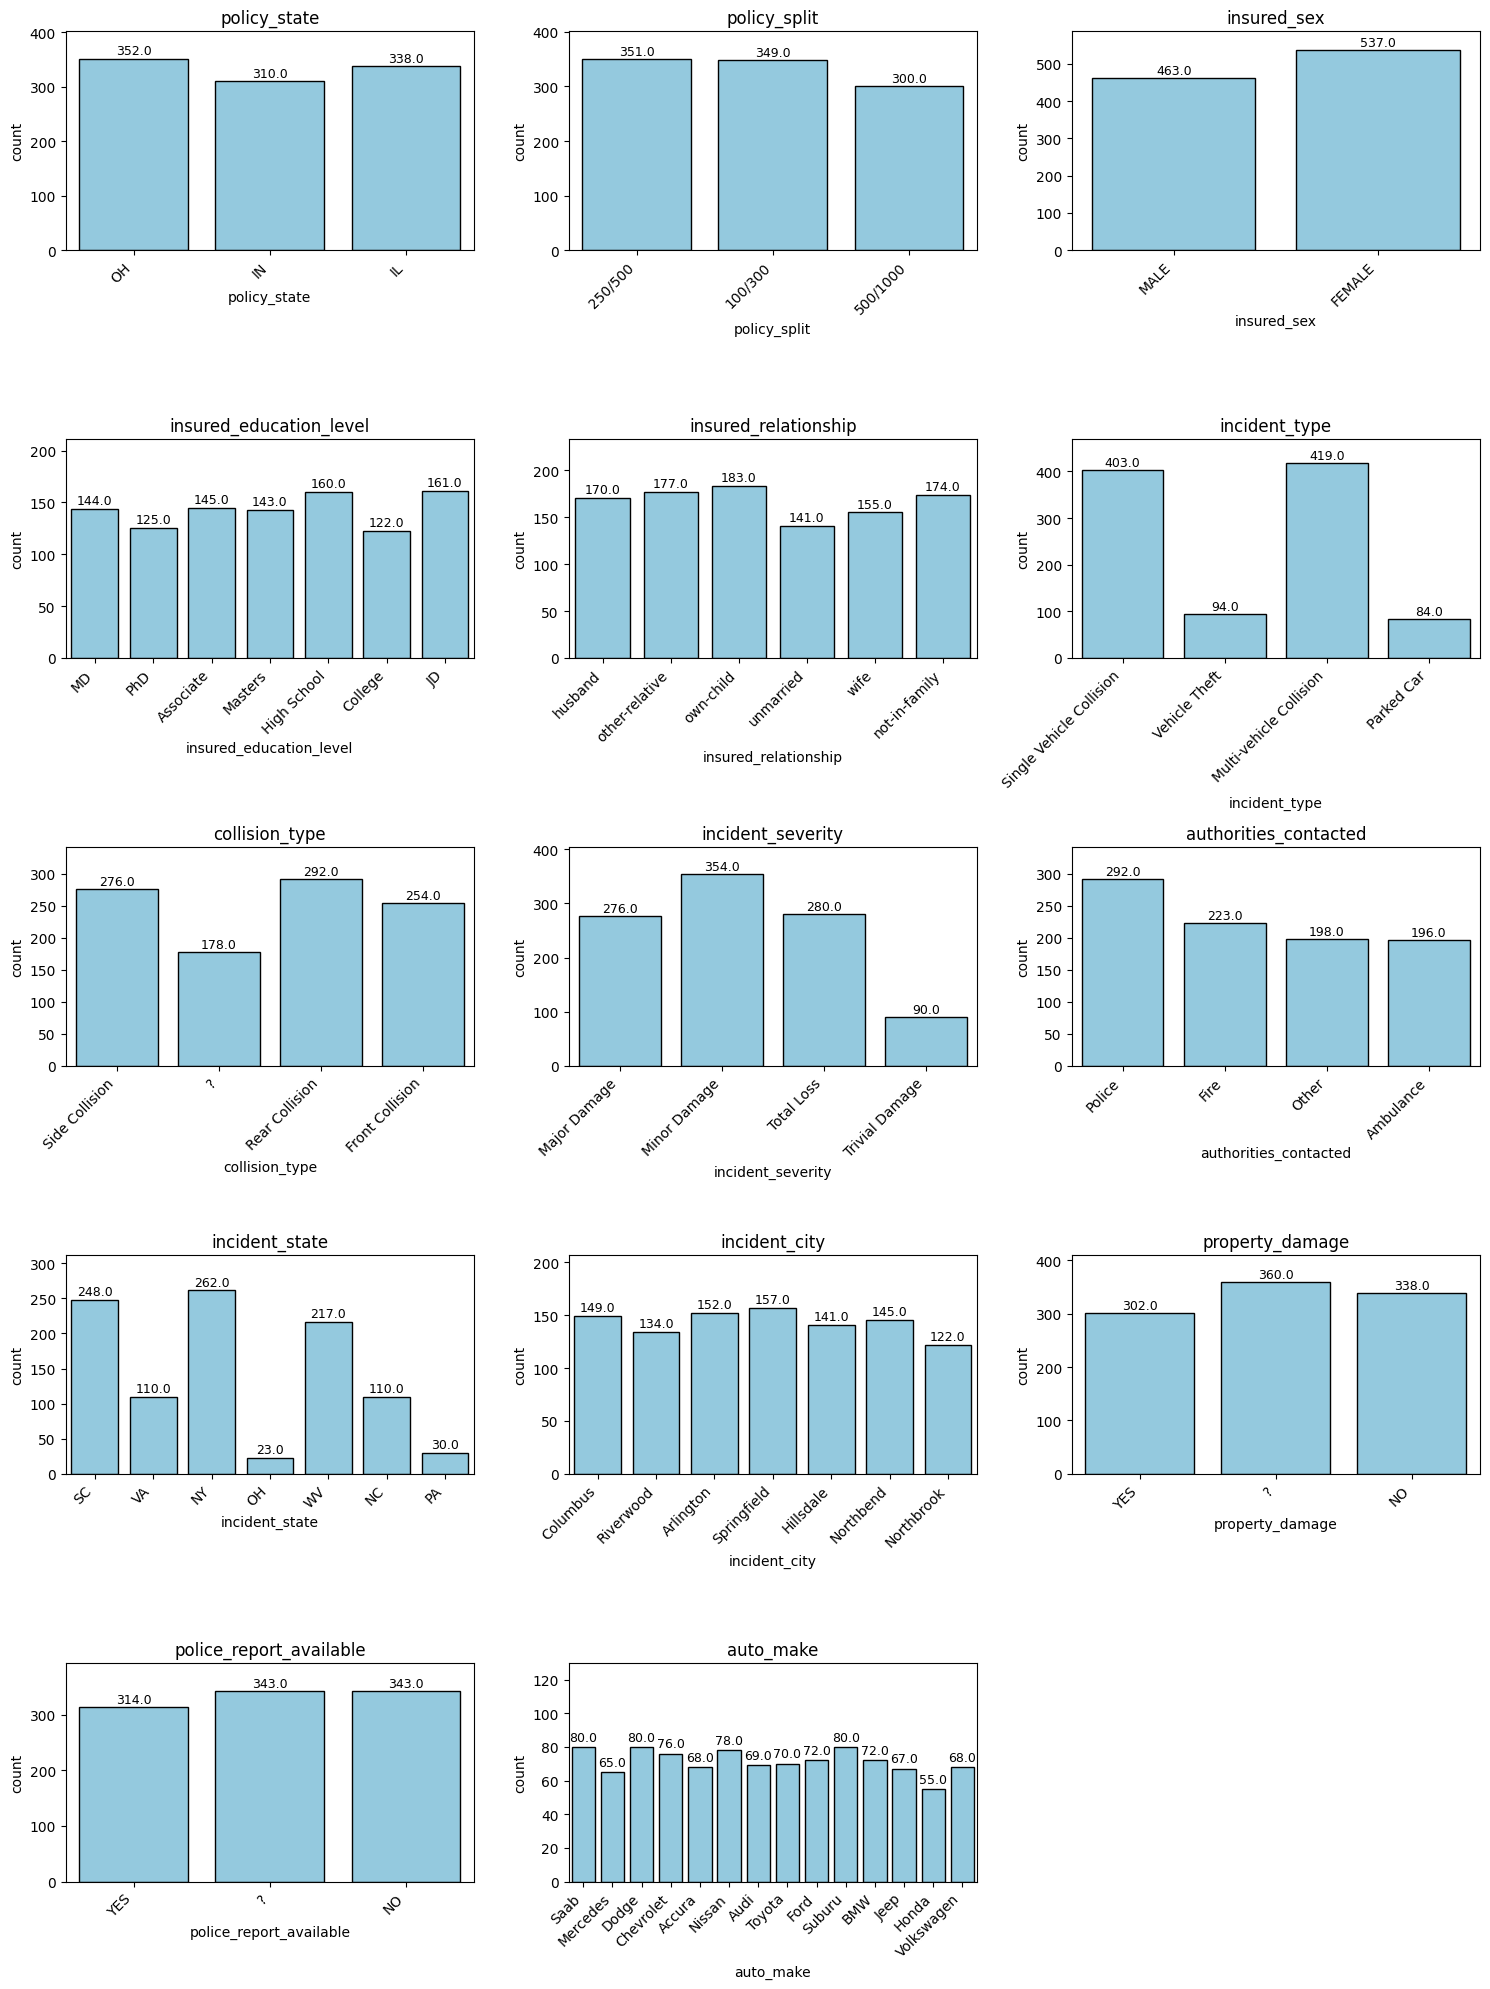

In [9]:
# Visualization of Frequency Distribution of low cardinality features
n_cols = 3
n_rows = math.ceil(len(cat_cols_copy) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(cat_cols_copy):
    ax = axes[i]
    sns.countplot(
        data=df_copy,
        x=col,
        color='skyblue',
        edgecolor='black',
        ax=ax
    )

    counts = df_copy[col].value_counts()

    # Annotate bars
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height + 2),
                    ha='center', va='bottom', fontsize=9, color='black')

    ax.set_title(col)
    ax.set_ylim(0, counts.max() + 50)

    # ✅ Safe way to rotate tick labels (avoids UserWarning)
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


- `incident_type`, `collision_type`, `incident_severity`, `authoriries_contacted` and `incident_state` have clear patterns while others are uniform

In [10]:
row_filter = df_copy.isin(["?"]).any(axis= 1)
col_filter = df_copy.isin(["?"]).any()
df_copy.loc[row_filter, col_filter]

,collision_type,property_damage,police_report_available
1,?,?,?
3,Front Collision,?,NO
4,?,NO,NO
6,Front Collision,?,?
7,Front Collision,?,YES
...,...,...,...
995,Front Collision,YES,?
996,Rear Collision,YES,?
997,Side Collision,?,YES
998,Rear Collision,?,YES


### Time Series Features

In [11]:
time_series_cols

['policy_bind_date', 'incident_date', 'incident_hour_of_the_day', 'auto_year']

In [12]:
# Check data type of incident_date
print(f'Data type of incident_date (before): {df_copy["incident_date"].dtype}')

df_copy["incident_date"] = pd.to_datetime(df_copy["incident_date"], format= "%d-%m-%Y")
print(f'Data type of incident_date (after): {df_copy["incident_date"].dtype}')

Data type of incident_date (before): object
Data type of incident_date (after): datetime64[ns]


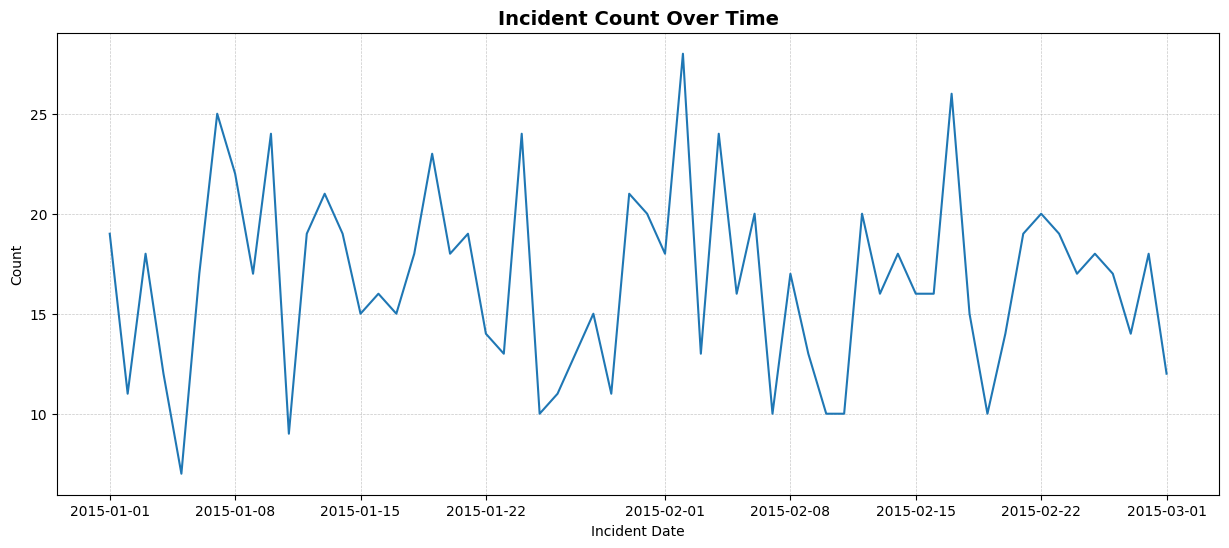

In [13]:
# Incident Count by Dates
values = df_copy["incident_date"].value_counts().values
index = df_copy["incident_date"].value_counts().index

plt.figure(figsize= (15,6))

sns.lineplot(
    x= index,
    y= values
)
plt.title("Incident Count Over Time", fontsize=14, fontweight='bold')

plt.xlabel("Incident Date")
plt.ylabel("Count")

plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

plt.show()

- There is no clear trend, instead the incident count fluctuate between the range of 7 (min value) and 28 (max value). Hence, incidents are highly volatile

#### Feature Engineering I

##### Derived time features

In [15]:
df_copy['year'] = df_copy['incident_date'].dt.year
df_copy['month'] = df_copy['incident_date'].dt.month
df_copy['day'] = df_copy['incident_date'].dt.day
df_copy['day_of_week'] = df_copy['incident_date'].dt.dayofweek
df_copy['is_weekend'] = df_copy['day_of_week'].isin([5,6]).astype(int)

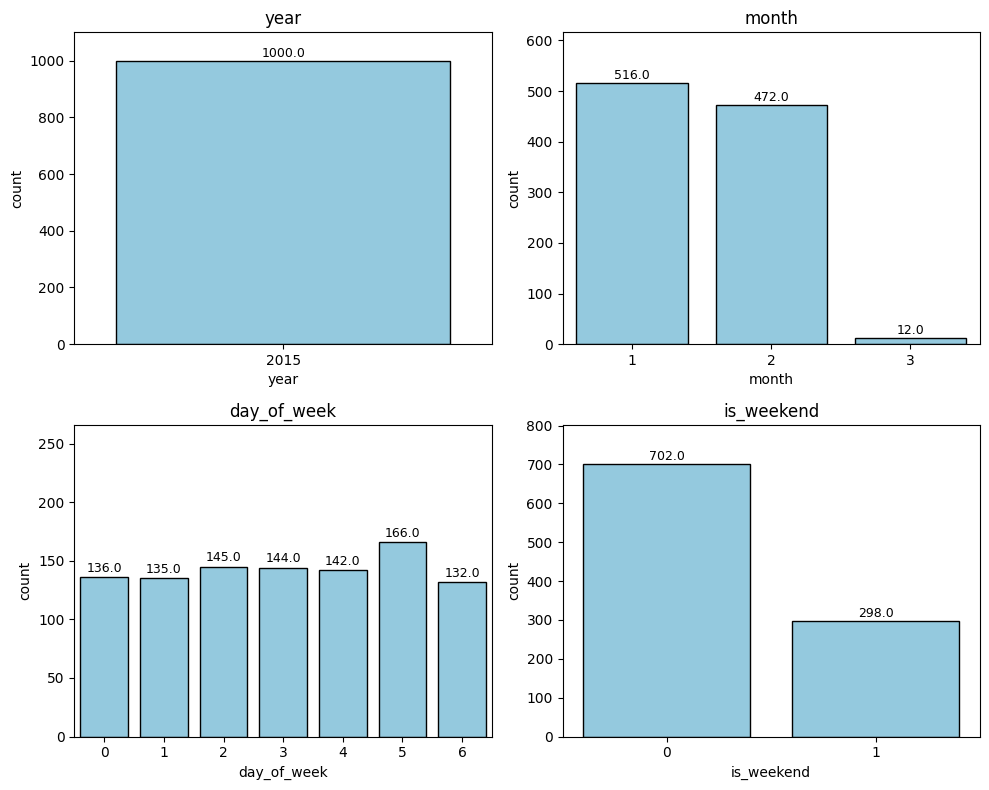

In [16]:
# Visualization of Frequency Distribution of Time Features

time_features = ["year", "month","day_of_week", "is_weekend"]
n_cols = 2
n_rows = math.ceil(len(time_features) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(time_features):
    ax = axes[i]
    sns.countplot(
        data=df_copy,
        x=col,
        color='skyblue',
        edgecolor='black',
        ax=ax
    )

    counts = df_copy[col].value_counts()

    # Annotate bars
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height + 2),
                    ha='center', va='bottom', fontsize=9, color='black')

    ax.set_title(col)
    ax.set_ylim(0, counts.max() + 100)

    # ✅ Safe way to rotate tick labels (avoids UserWarning)
    # plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


- Weekends (Saturday & Sunday) contribute 29.8% (~30%) of the incidents, indicating a clear pattern.

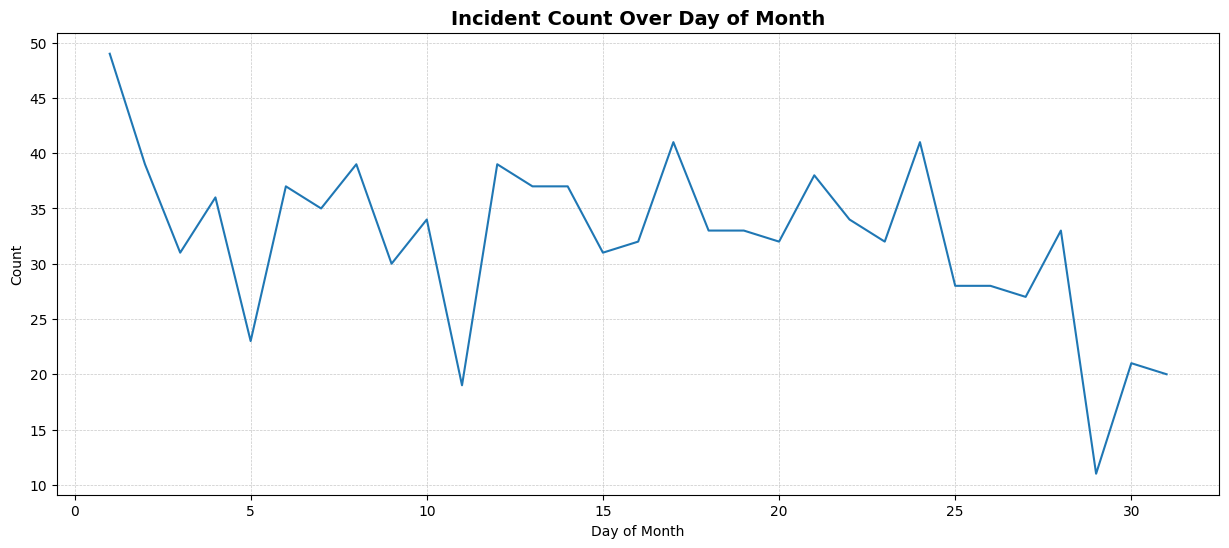

In [17]:
index= df_copy['day'].value_counts().index
values= df_copy['day'].value_counts().values

plt.figure(figsize= (15,6))

sns.lineplot(
    x= index,
    y= values
)
plt.title("Incident Count Over Day of Month", fontsize=14, fontweight='bold')

plt.xlabel("Day of Month")
plt.ylabel("Count")

plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

plt.show()

- A slight downtrend can be observed across the month.
- Incident counts peak at the beginning of the month followed by a period of stability
- In the final 5–6 days, incident frequency drops noticeably.

# Data Segmentation
Before data preprocessing activities, we will segment data based on `total_claim_amount` to avoid data leakage issues.

In [18]:
from scipy.stats import gaussian_kde
from scipy.signal import find_peaks

def kde_antimode(data, grid_points=1000, bw_method='scott'):
    data = np.asarray(data)
    kde = gaussian_kde(data, bw_method=bw_method)
    grid = np.linspace(data.min() - 1e-6, data.max() + 1e-6, grid_points)
    dens = kde(grid)

    # find peaks in density
    peaks, _ = find_peaks(dens)
    if len(peaks) < 2:
        raise ValueError("Less than 2 peaks found in KDE — bimodality not evident on this grid")

    # select two highest peaks
    peak_vals = dens[peaks]
    top2_idx = peaks[np.argsort(peak_vals)[-2:]]  # indices of two largest peaks
    left, right = np.min(top2_idx), np.max(top2_idx)

    # find minima (valley) between the two peak indices
    between_idx = np.arange(left, right + 1)
    valley_idx = between_idx[np.argmin(dens[between_idx])]
    antimode = grid[valley_idx]

    return antimode, grid, dens, peaks

# Example usage:
# antimode, grid, dens, peaks = kde_antimode(data)
# print("Split at:", antimode)

antimode, grid, dens, peaks = kde_antimode(df_copy['total_claim_amount'])
print("Split at:", antimode)

Split at: 22397.377376765762


### Using test value

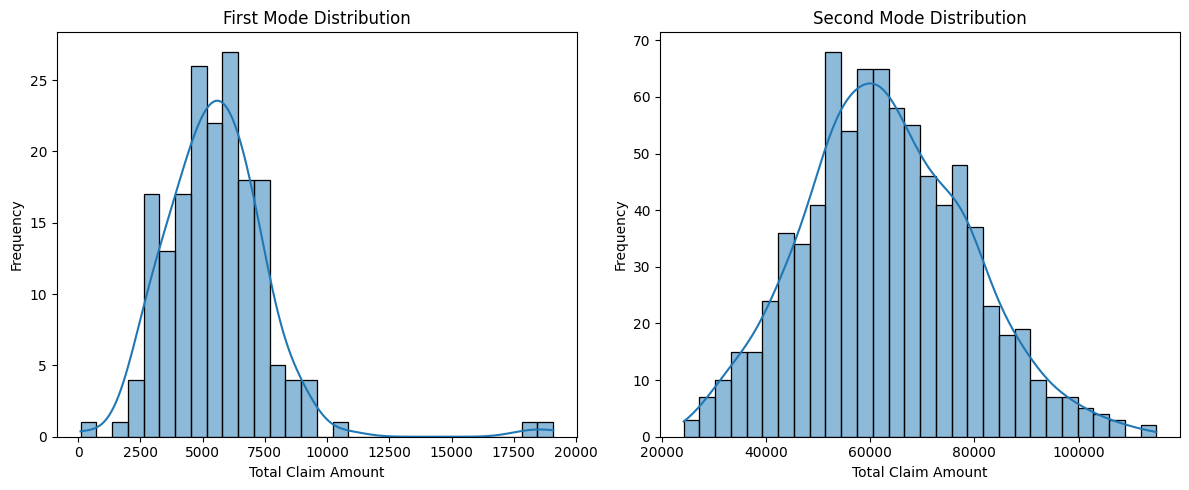

In [19]:
split_point = 22397.377376765762

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# First Mode
sns.histplot(
    data=df_copy[df_copy['total_claim_amount'] <= split_point]['total_claim_amount'],
    kde=True,
    bins=30,
    ax=axes[0]
)
axes[0].set_title("First Mode Distribution")
axes[0].set_xlabel("Total Claim Amount")
axes[0].set_ylabel("Frequency")

# Second Mode
sns.histplot(
    data=df_copy[df_copy['total_claim_amount'] > split_point]['total_claim_amount'],
    kde=True,
    bins=30,
    ax=axes[1]
)
axes[1].set_title("Second Mode Distribution")
axes[1].set_xlabel("Total Claim Amount")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

First mode is skewed, we can adjust the split point to ensure normal distribution

### Using adjusted value

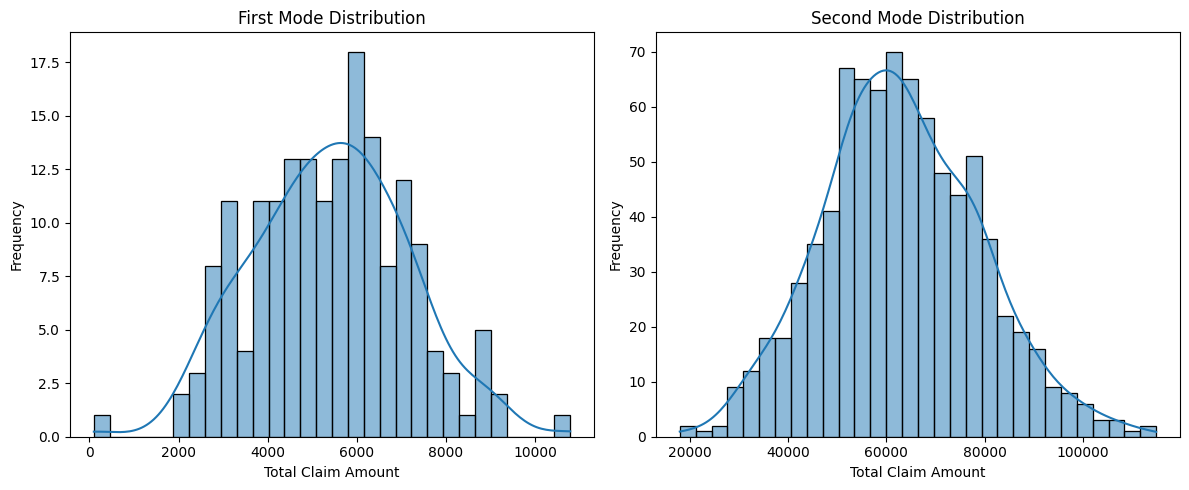

In [20]:
split_point = 12500

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# First Mode
sns.histplot(
    data=df_copy[df_copy['total_claim_amount'] <= split_point]['total_claim_amount'],
    kde=True,
    bins=30,
    ax=axes[0]
)
axes[0].set_title("First Mode Distribution")
axes[0].set_xlabel("Total Claim Amount")
axes[0].set_ylabel("Frequency")

# Second Mode
sns.histplot(
    data=df_copy[df_copy['total_claim_amount'] > split_point]['total_claim_amount'],
    kde=True,
    bins=30,
    ax=axes[1]
)
axes[1].set_title("Second Mode Distribution")
axes[1].set_xlabel("Total Claim Amount")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

### Data Tables

In [ ]:
df_copy_below_point = df_copy[df_copy['total_claim_amount'] <= split_point]
df_copy_below_point.to_csv(
    "data/raw/insurance_claims_below_point.csv",
    index= False
    
)

df_copy_above_point = df_copy[df_copy['total_claim_amount'] > split_point]
df_copy_above_point.to_csv(
    "data/raw/insurance_claims_above_point.csv",
    index= False
    
)